<a href="https://colab.research.google.com/github/II3axapII/EBW_Prediction_Analysis/blob/main/EBW_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Прогнозирование размеров сварного шва при электронно-лучевой сварке

**Описание**: В данном исследовании проводится анализ экспериментальных данных по сварке изделий из разнородных материалов для прогнозирования размеров сварного шва (глубина и ширина) на основе параметров технологического процесса.

**Цели**:
1. Провести разведочный анализ данных.
2. Обработать данные для корректного применения моделей.
3. Обучить несколько моделей машинного обучения.
4. Оценить их качество и выбрать лучшую модель.


In [19]:

# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
file_path = 'ebw_data.csv'
ebw_data = pd.read_csv(file_path)

# Отображение первых строк
ebw_data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


## Разведочный анализ данных

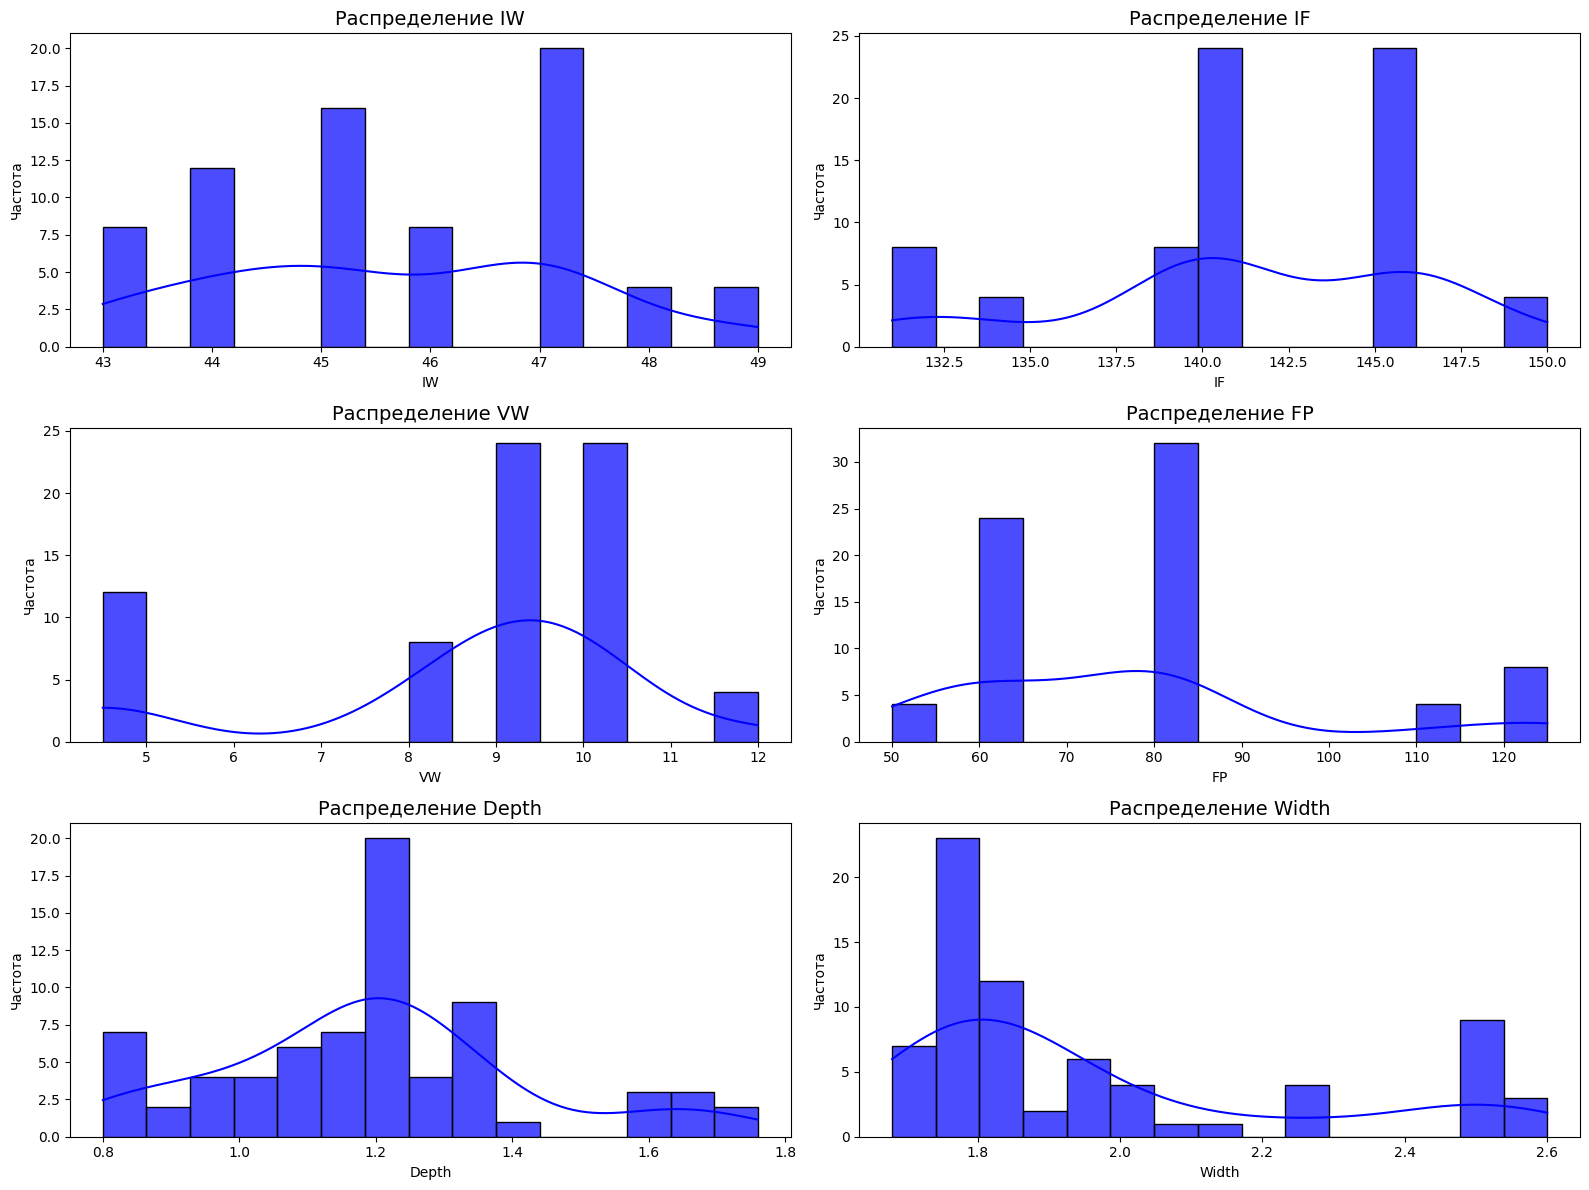

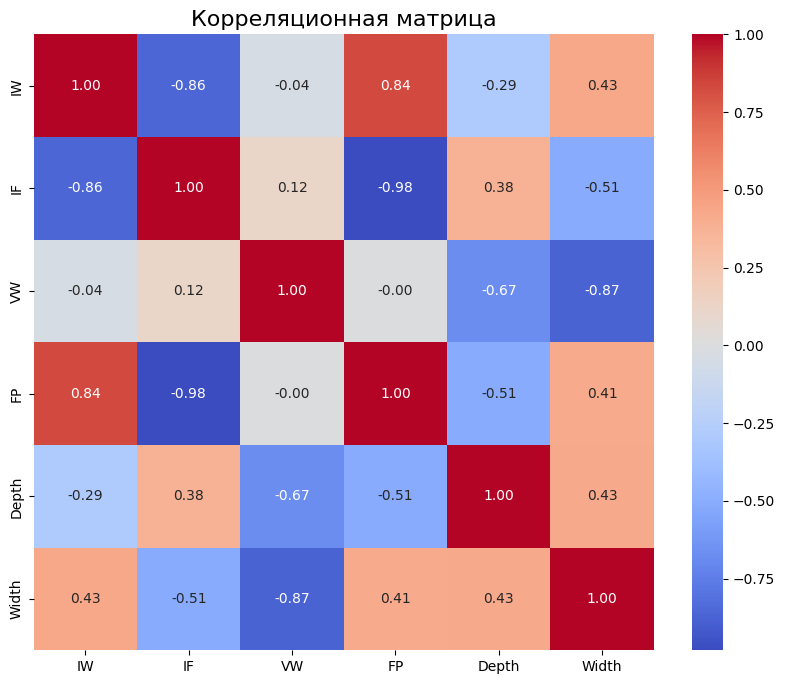

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [20]:

# Статистическое описание данных
description = ebw_data.describe()

# Визуализация распределения каждого параметра
plt.figure(figsize=(16, 12))
for i, column in enumerate(ebw_data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(ebw_data[column], kde=True, bins=15, color='blue', alpha=0.7)
    plt.title(f'Распределение {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = ebw_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

description


## Предобработка данных

In [21]:

# Разделение данных на признаки (X) и целевые переменные (y)
X = ebw_data[['IW', 'IF', 'VW', 'FP']]
y_depth = ebw_data['Depth']
y_width = ebw_data['Width']

# Разделение на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train_depth, y_test_depth = train_test_split(X, y_depth, test_size=0.2, random_state=42)
_, _, y_train_width, y_test_width = train_test_split(X, y_width, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка масштабированных данных
X_train_scaled[:5]


array([[ 0.74265882, -0.04987216,  1.65415353,  0.04321141],
       [-0.99699403,  0.89769886,  0.06057464, -0.85244335],
       [-0.99699403,  0.89769886,  0.06057464, -0.85244335],
       [ 1.32254311, -1.94501419,  0.5917676 ,  2.05843464],
       [ 1.90242739, -1.75549998, -0.47061833,  2.05843464]])

## Обучение моделей для предсказания глубины шва (Depth)

In [22]:

# Инициализация моделей
models = {
    "Линейная регрессия": LinearRegression(),
    "Случайный лес": RandomForestRegressor(random_state=42, n_estimators=100),
    "Градиентный бустинг": GradientBoostingRegressor(random_state=42)
}

# Обучение моделей для предсказания Depth и оценка качества
results_depth = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_depth)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_depth, predictions)
    r2 = r2_score(y_test_depth, predictions)
    results_depth[name] = {"MSE": mse, "R2": r2}

# Преобразование результатов в таблицу
results_depth_df = pd.DataFrame(results_depth).T
results_depth_df


,MSE,R2
Линейная регрессия,0.022332,0.615444
Случайный лес,0.007791,0.865850
Градиентный бустинг,0.006922,0.880801


## Обучение моделей для предсказания ширины шва (Width)

In [23]:

# Обучение моделей для предсказания Width и оценка качества
results_width = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_width)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_width, predictions)
    r2 = r2_score(y_test_width, predictions)
    results_width[name] = {"MSE": mse, "R2": r2}

# Преобразование результатов в таблицу
results_width_df = pd.DataFrame(results_width).T
results_width_df


,MSE,R2
Линейная регрессия,0.002293,0.977123
Случайный лес,0.002142,0.978630
Градиентный бустинг,0.001744,0.982603


## Визуализация предсказаний

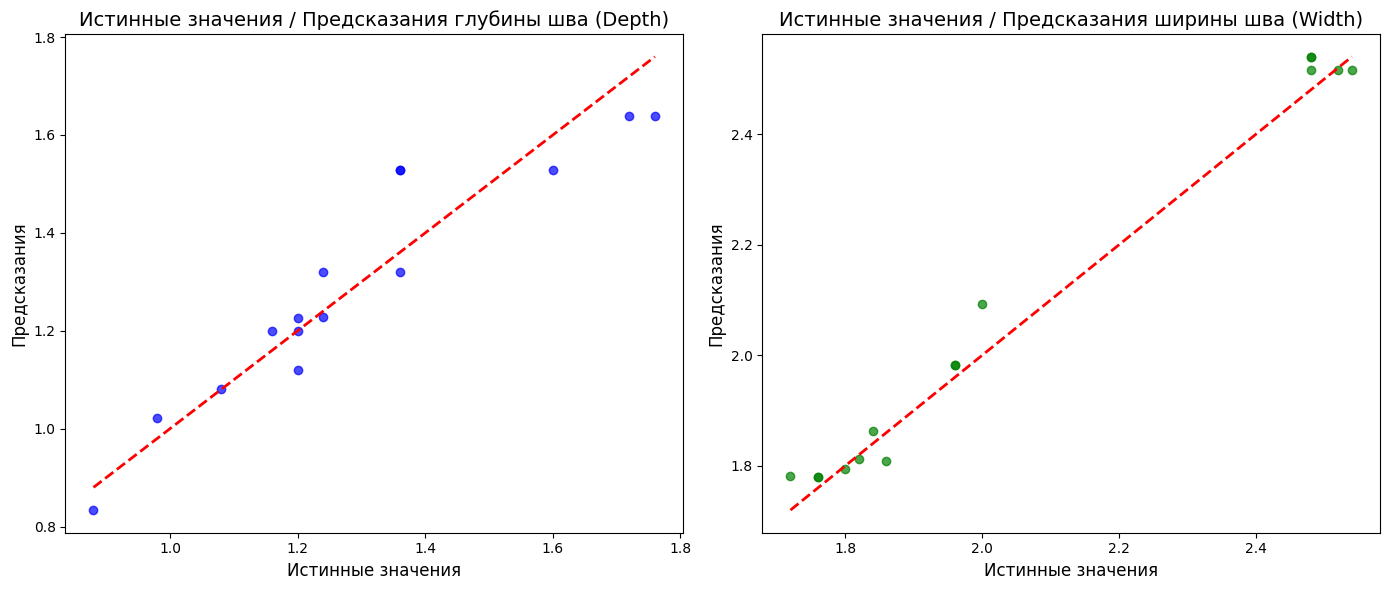

In [25]:

# Визуализация предсказаний для лучшей модели (Градиентный бустинг)
best_model_depth = GradientBoostingRegressor(random_state=42)
best_model_depth.fit(X_train_scaled, y_train_depth)
predictions_depth = best_model_depth.predict(X_test_scaled)

best_model_width = GradientBoostingRegressor(random_state=42)
best_model_width.fit(X_train_scaled, y_train_width)
predictions_width = best_model_width.predict(X_test_scaled)

# График: Истинные значения / Предсказания для Depth
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_depth, predictions_depth, alpha=0.7, color='blue')
plt.plot([y_test_depth.min(), y_test_depth.max()], [y_test_depth.min(), y_test_depth.max()], 'r--', lw=2)
plt.title('Истинные значения / Предсказания глубины шва (Depth)', fontsize=14)
plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказания', fontsize=12)

# График: Истинные значения / Предсказания для Width
plt.subplot(1, 2, 2)
plt.scatter(y_test_width, predictions_width, alpha=0.7, color='green')
plt.plot([y_test_width.min(), y_test_width.max()], [y_test_width.min(), y_test_width.max()], 'r--', lw=2)
plt.title('Истинные значения / Предсказания ширины шва (Width)', fontsize=14)
plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказания', fontsize=12)

plt.tight_layout()
plt.show()



На графиках выше представлены результаты работы модели градиентного бустинга для прогнозирования глубины (Depth) и ширины (Width) сварного шва:
- линии 𝑦 = 𝑥 (красные пунктирные линии) показывают идеальное соответствие между прогнозируемыми и реальными значениями.
- точки, близкие к линии, указывают на высокую точность предсказаний.


# Обоснование выбора модели и заключение

### Обоснование выбора модели градиентного бустинга

Для задачи прогнозирования глубины (Depth) и ширины (Width) сварного шва были протестированы три модели:
- Линейная регрессия.
- Случайный лес.
- Градиентный бустинг.

На основе метрик качества (MSE и R²) можно сделать следующие выводы:
1. **Линейная регрессия** продемонстрировала наименьшее качество предсказания по сравнению с деревоподобными моделями. Это связано с тем, что линейные зависимости не способны учесть сложные взаимодействия между параметрами сварки.
2. **Случайный лес** показал значительно лучшие результаты благодаря учету нелинейностей и взаимодействий, однако уступил градиентному бустингу в точности.
3. **Градиентный бустинг** обеспечил наименьшие значения ошибки (MSE) и максимальные значения коэффициента детерминации (R²) для обеих целевых переменных. Это делает его наиболее подходящей моделью для данной задачи.

### Заключение

На основании анализа и тестирования различных алгоритмов, модель градиентного бустинга была выбрана как наиболее подходящая для прогнозирования параметров сварного шва. Она продемонстрировала следующие результаты:
- Для предсказания глубины шва (Depth): MSE = 0.006922, R² = 0.880801.
- Для предсказания ширины шва (Width): MSE = 0.001744, R² = 0.982603.

Результаты указывают на высокую точность модели, что позволяет использовать ее для оптимизации технологических процессов электронно-лучевой сварки.

### Рекомендации

1. **Дальнейшее улучшение модели**: Провести настройку гиперпараметров градиентного бустинга для потенциального повышения точности.
2. **Практическое применение**: Использовать модель для предсказания параметров сварного шва в реальных производственных условиях.
3. **Дополнительные эксперименты**: Расширить набор данных для повышения обобщающей способности модели.

### Итог

Модель градиентного бустинга рекомендована для прогнозирования размеров сварного шва при электронно-лучевой сварке, учитывая ее высокую точность и устойчивость.